---

# <center> ★ AI / ML Project - Auto MPG Prediction ★

---

<img src="a.jpg" style="width: 400px;"/>

---

### Description:

The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository

"The data concerns city-cycle fuel consumption in miles per gallon,
to be predicted in terms of 3 multivalued discrete and 5 continuous
attributes." (Quinlan, 1993)
Number of Instances: 398
Number of Attributes: 9 including the class attribute

#### Acknowledgements
Dataset: UCI Machine Learning Repository<br>
Data link : https://archive.ics.uci.edu/ml/datasets/auto+mpg


### Objective:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the sales w.r.t a single & multiple feature.
- Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

---

# <center>1. Data Exploration

In [2]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Importing the dataset

df = pd.read_csv('auto-mpg.csv', names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'], skiprows=1)
df.reset_index(drop=True, inplace=True)
original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino



Inference: The Datset consists of 9 features & 398 samples.


In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
#Checking number of unique rows in each feature

df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model_year       13
origin            3
car_name        305
dtype: int64

In [6]:
#Checking the stats of all the columns

display(df.describe())

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


**Inference:** The stats seem to be fine, let us do further analysis on the Dataset

---

# <center> 2. Exploratory Data Analysis (EDA)

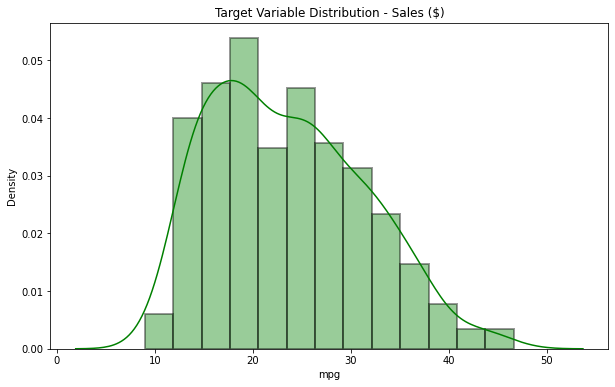

In [7]:
#Let us first analyze the distribution of the target variable

c = df.columns
sns.distplot(df[c[0]], color='g',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title('Target Variable Distribution - Sales ($)')
plt.show()

**Inference:**The Target Variable seems to be be normally distributed, averaging around 12$(units)

                                         Visualising Categorical Features:                                          


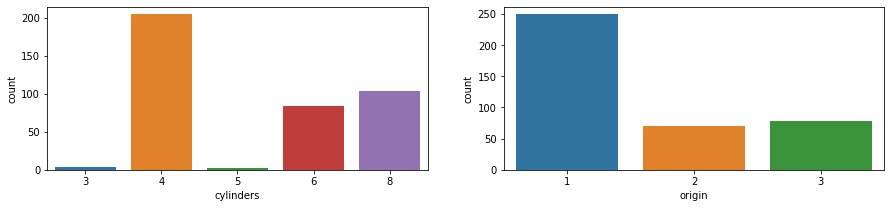

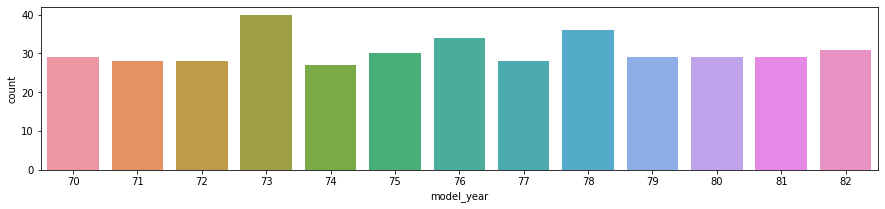

In [8]:
#Visualising the categorical features 

cf = ['cylinders','origin','model_year']

print('\033[1mVisualising Categorical Features:'.center(120))

plt.figure(figsize=[15,3])
plt.subplot(1,2,1)
sns.countplot(df[cf[0]])
plt.subplot(1,2,2)
sns.countplot(df[cf[1]])
plt.show()

plt.figure(figsize=[15,3])
plt.subplot(1,1,1)
sns.countplot(df[cf[2]])
plt.show()

**Inference:** 4 cylinders & 1 origin seem to be domiant classes, while the frequency of classes in model_year are relatively consistent

                                                Numeric Features Distribution                                                 


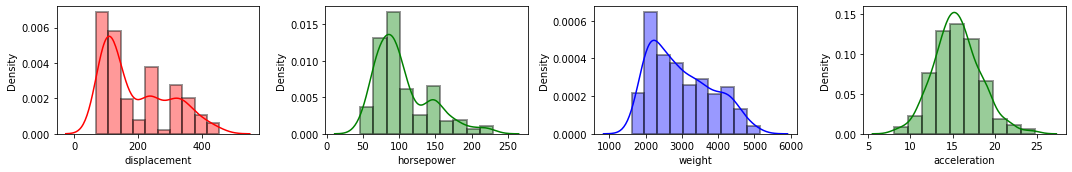

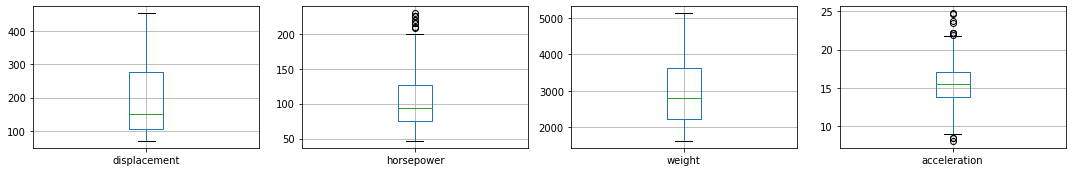

In [9]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

nf = ['displacement','horsepower','weight','acceleration']

df = df[~df['horsepower'].isin(['?'])]
df.reset_index(drop=True, inplace=True)
df['horsepower']= df['horsepower'].astype(int)

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,2.5])
for i in range(4):
    plt.subplot(1,4,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=clr[i])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,2.5])
for i in range(4):
    plt.subplot(1,4,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

**Inference:** There seem to be some outliers in the horsepower & acceleration features

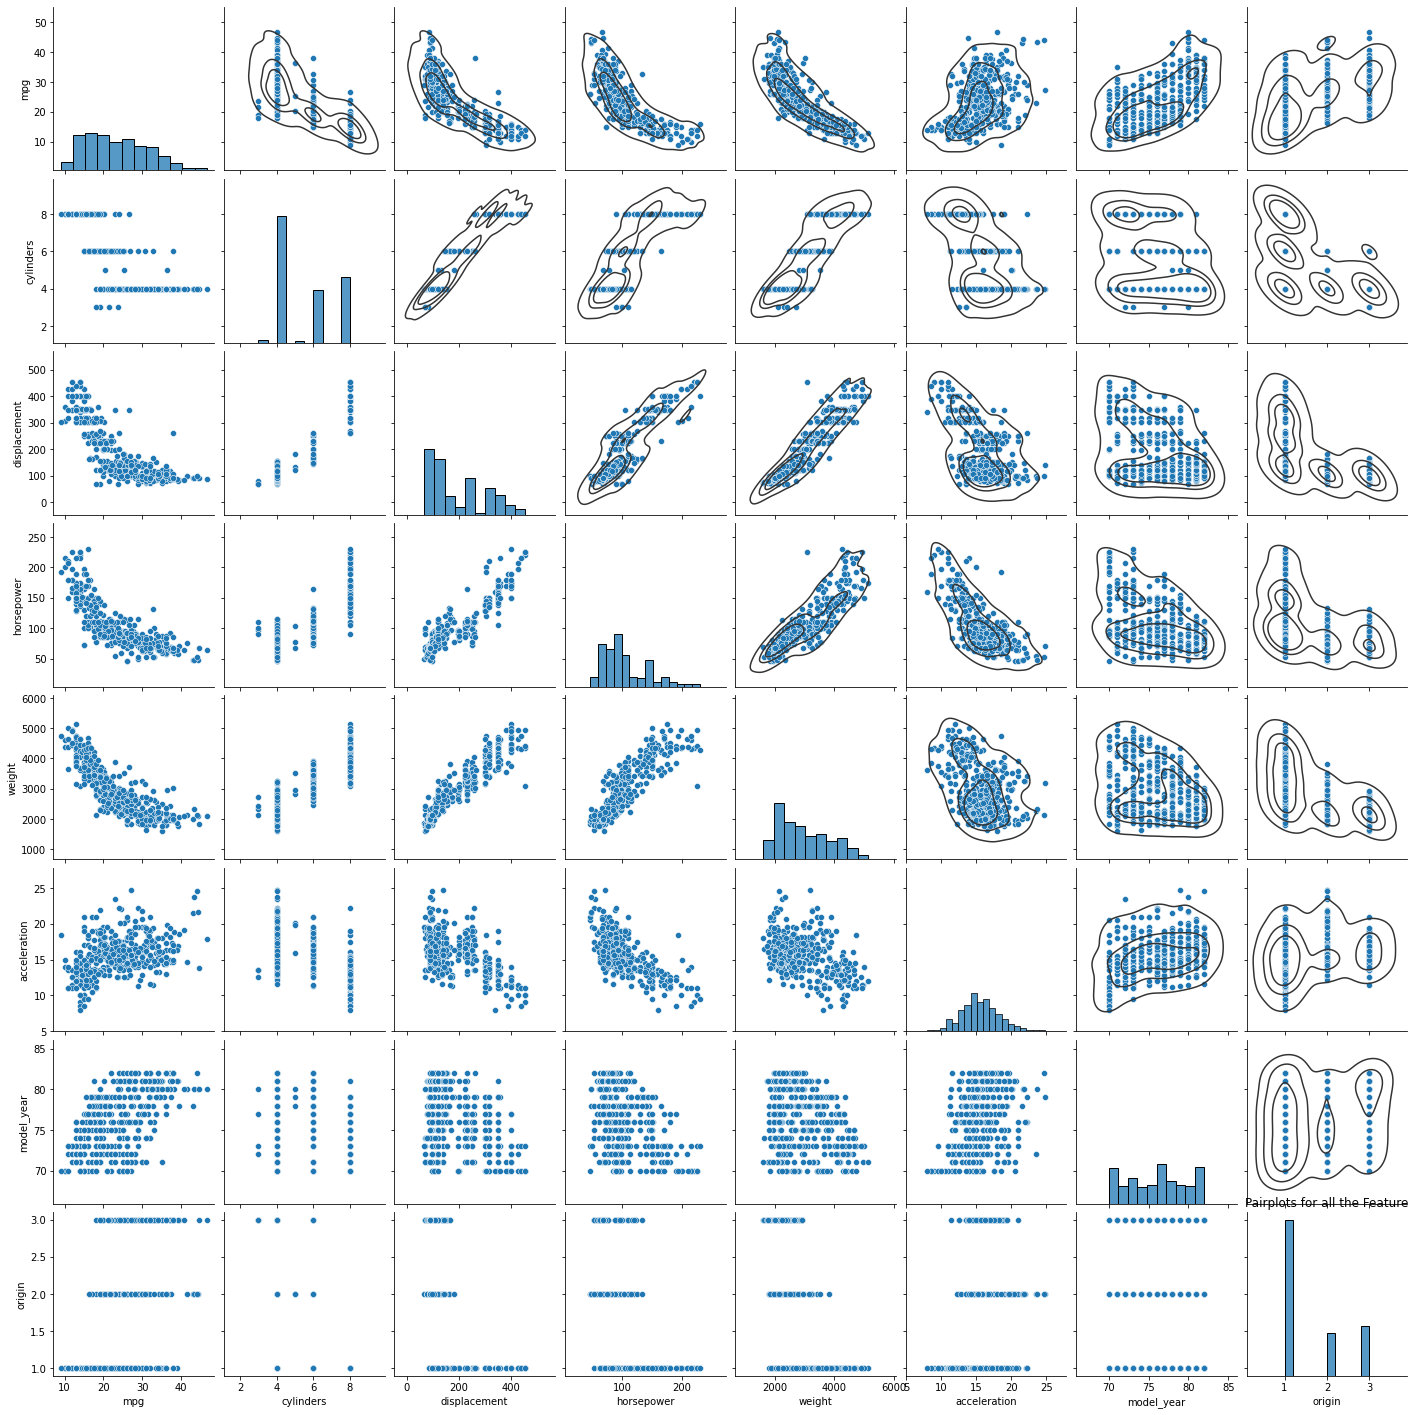

In [11]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

**Inference:** We can notice that few have linear relationship, like that of displacement & horspower, while others features are not more randomly distributed

---

# <center> 3. Data Preprocessing

In [12]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset had {} inconsistant/null elements which were dropped.'.format(original_df.shape[0]-df.shape[0]))

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

Inference: The dataset had 6 inconsistant/null elements which were dropped.


In [13]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {r-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [13]:
#Removal of outlier:

df = df.drop(['car_name'], axis=1)

for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df = df[df[i] <= (Q3+(1.5*IQR))]
    df = df[df[i] >= (Q1-(1.5*IQR))]
    df = df.reset_index(drop=True)
display(df)
print('\n\033[1mInference:\033[0m After removal of outliers, The dataset now has {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
368,27.0,4,151.0,90,2950,17.3,82,1
369,27.0,4,140.0,86,2790,15.6,82,1
370,32.0,4,135.0,84,2295,11.6,82,1
371,28.0,4,120.0,79,2625,18.6,82,1



Inference: After removal of outliers, The dataset now has 8 features & 373 samples.


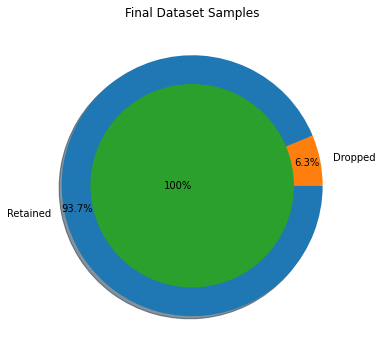


Inference: After the cleanup process, 25 samples were dropped, while retaining 14.92% of the data.


In [17]:
#Final Dataset size after performing Preprocessing

plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {df.shape[0]/(original_df.shape[0]-df.shape[0])}% of the data.')

---

# <center> 4. Data Manipulation

In [70]:
#Splitting the data intro training & testing sets

from sklearn.model_selection import train_test_split

X = df.drop(['mpg'],axis=1)
Y = df.mpg
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)
Train_X.reset_index(drop=True,inplace=True)
Train_X.reset_index(drop=True,inplace=True)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (373, 7) (373,) 
Training set  --->  (298, 7) (298,) 
Testing set   --->  (75, 7)  (75,)


In [71]:
#Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(80))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(80))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                     Standardardization on Training set                     


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02
mean,-1.132577e-16,-6.258975e-17,1.639255e-16,2.354567e-16,6.139757e-16,-7.600184e-16,1.192186e-16
std,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00
min,-1.434665e+00,-1.193437e+00,-1.661251e+00,-1.579042e+00,-2.122077e+00,-1.666395e+00,-7.521953e-01
25%,-8.367204e-01,-8.415279e-01,-7.759633e-01,-8.610395e-01,-6.720466e-01,-8.341285e-01,-7.521953e-01
50%,-8.367204e-01,-4.845917e-01,-2.152813e-01,-2.629963e-01,-5.060508e-02,-1.861894e-03,-7.521953e-01
75%,3.591678e-01,6.968168e-01,5.224582e-01,7.010703e-01,6.019085e-01,8.304047e-01,4.726910e-01
max,1.555056e+00,2.416143e+00,2.883225e+00,2.548743e+00,2.600879e+00,1.662671e+00,1.697577e+00



                      Standardardization on Testing set                      


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.024319,0.002919,-0.066553,-0.100686,-0.121311,0.142398,-0.115254
std,0.998812,0.958443,0.958450,0.830193,1.010223,1.018150,0.993879
min,-1.434665,-1.213546,-1.572722,-1.366041,-2.536371,-1.666395,-0.752195
25%,-0.836720,-0.841528,-0.790718,-0.909023,-0.713476,-0.695417,-0.752195
50%,-0.836720,-0.379019,-0.362829,-0.148888,-0.050605,0.275560,-0.752195
75%,0.359168,0.656599,0.345401,0.597203,0.529407,0.830405,0.472691
max,1.555056,2.416143,2.824206,1.613642,1.855149,1.662671,1.697577


---

# <center> 5. Feature Selection/Extraction

                           Final Dataset Samples                            


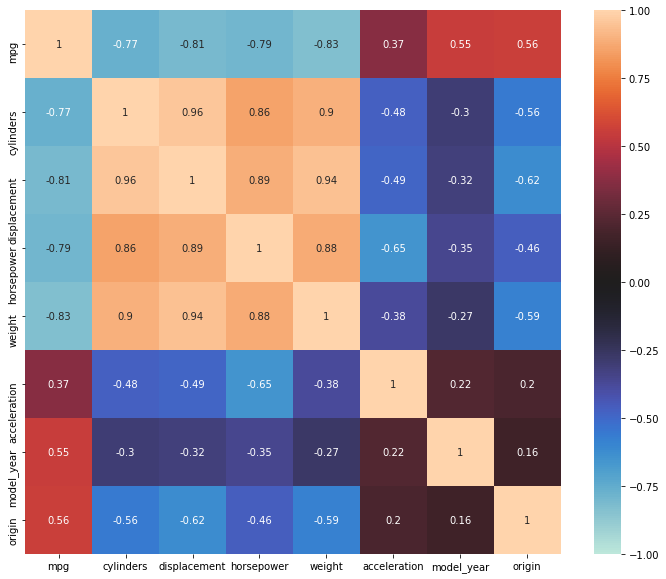

In [72]:
#Checking the correlation

print('\033[1mFinal Dataset Samples'.center(80))
plt.figure(figsize=[12,10])
sns.heatmap(df.corr(), annot=True, center=0, vmin=-1, vmax=1)
plt.show()

**Inference:** There seems to be strong multi-correlation between the features. Let us try to fix those in the Modelling section

In [73]:
#Testing a Linear Regression model with statsmodels

from statsmodels.formula import api

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula=f'{a[-1]} ~ {a[0]} + {a[1]} + {a[2]} + {a[3]} + {a[4]} + {a[5]} + {a[6]}', data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     186.1
Date:                Fri, 12 Nov 2021   Prob (F-statistic):          2.55e-103
Time:                        14:40:45   Log-Likelihood:                -777.87
No. Observations:                 298   AIC:                             1572.
Df Residuals:                     290   BIC:                             1601.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       23.5379      0.193    121.775      0.000      23.157      23.918
cylinders       -0.3307      0.679     -0.487      0.627      -1.667       1.006
displacement     1.1648      0.957      1.218      0.224      -0.718       3.048
horsepower      -1.1618      0.630     -1.844      0.066      -2.402       0.078
weight          -4.9058      0.752     -6.522      0.000      -6.386      -3.425
acceleration    -0.1691      0.315     -0.538      0.591      -0.788       0.450
model_year       2.6255      0.209     12.546      0.000       2.214       3.037
origin           1.1068      0.259      4.268      0.000       0.596       1.617
==============================================================================
Omnibus:                       28.397   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.017
Skew:                           0.590   Prob(JB):                     1.02e-10
Kurtosis:                       4.521   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 ---

**Inference:** 
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)

## 5a. Manual Method - VIF

In [74]:
# Calculate the VIFs to remove multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = Train_xy.drop(['mpg'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,displacement,24.50
3,weight,15.14
0,cylinders,12.34
2,horsepower,10.62
4,acceleration,2.65
6,origin,1.80
5,model_year,1.17


In [75]:
#Iter 1

Train_xy_1 = Train_xy.drop(['displacement'], axis=1)
a = Train_xy_1.columns.values

API = api.ols(formula=f'{a[-1]} ~ {a[0]} + {a[1]} + {a[2]} + {a[3]} + {a[4]} + {a[5]}', data=Train_xy_1).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     216.6
Date:                Fri, 12 Nov 2021   Prob (F-statistic):          3.47e-104
Time:                        14:41:15   Log-Likelihood:                -778.63
No. Observations:                 298   AIC:                             1571.
Df Residuals:                     291   BIC:                             1597.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       23.5379      0.193    121.675      0.000      23.157      23.919
cylinders        0.2535      0.481      0.527      0.599      -0.693       1.200
horsepower      -1.1748      0.630     -1.864      0.063      -2.416       0.066
weight          -4.4173      0.637     -6.937      0.000      -5.670      -3.164
acceleration    -0.2545      0.307     -0.829      0.408      -0.858       0.349
model_year       2.6029      0.209     12.476      0.000       2.192       3.013
origin           1.0086      0.247      4.089      0.000       0.523       1.494
==============================================================================
Omnibus:                       29.814   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.873
Skew:                           0.603   Prob(JB):                     1.48e-11
Kurtosis:                       4.600   Cond. No.                         8.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Calculate the VIFs to remove multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = Train_xy_1.drop(['mpg'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,weight,10.83
1,horsepower,10.62
0,cylinders,6.18
3,acceleration,2.52
5,origin,1.63
4,model_year,1.16


In [77]:
#Iter 2

Train_xy_2 = Train_xy.drop(['displacement','weight'],axis=1)
a = Train_xy_2.columns.values

API = api.ols(formula=f'{a[-1]} ~ {a[0]} + {a[1]} + {a[2]} + {a[3]} + {a[4]}', data=Train_xy_2).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     215.5
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           9.77e-96
Time:                        14:41:16   Log-Likelihood:                -801.44
No. Observations:                 298   AIC:                             1615.
Df Residuals:                     292   BIC:                             1637.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       23.5379      0.208    112.905      0.000      23.128      23.948
cylinders       -1.4507      0.446     -3.256      0.001      -2.328      -0.574
horsepower      -4.2234      0.487     -8.671      0.000      -5.182      -3.265
acceleration    -1.3975      0.279     -5.009      0.000      -1.947      -0.848
model_year       2.3736      0.222     10.692      0.000       1.937       2.811
origin           1.4420      0.257      5.607      0.000       0.936       1.948
==============================================================================
Omnibus:                       27.561   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.713
Skew:                           0.592   Prob(JB):                     5.31e-10
Kurtosis:                       4.428   Cond. No.                         5.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<<<-----------------------------------Evaluating Simple Linear Regression Model----------------------------------->>>

The Coeffecient of the Linear Regresion Model was found to be  [-1.45071197 -4.2233568  -1.39745292  2.37359801  1.4419944 ]
The Intercept of the Linear Regresion Model was found to be  23.537919463087256


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.79
Residual Sum of Squares (RSS) on Training set  ---> 3781.91
Mean Squared Error (MSE) on Training set       ---> 12.69
Root Mean Squared Error (RMSE) on Training set ---> 3.56

--------------------Test Set Metrics--------------------

R2-Score on Testing set ---> 0.8
Residual Sum of Squares (RSS) on Training set  ---> 758.53
Mean Squared Error (MSE) on Training set       ---> 10.11
Root Mean Squared Error (RMSE) on Training set ---> 3.18

--------------------Residual Plots--------------------


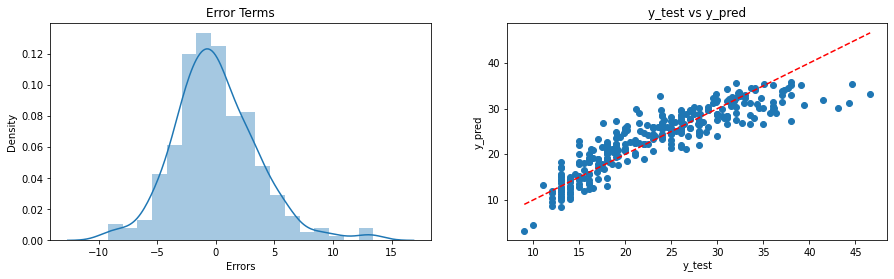

In [78]:
#Evaluating the Multiple Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('{}{}\033[1mEvaluating Simple Linear Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

MLR = LinearRegression().fit(Train_X_std.drop(['displacement','weight'],axis=1),Train_Y)

print('The Coeffecient of the Linear Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Linear Regresion Model was found to be ',MLR.intercept_)

#Plotting predicted predicteds alongside the actual datapoints 

pred = MLR.predict(Train_X_std.drop(['displacement','weight'],axis=1))

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
pred1 = MLR.predict(Train_X_std.drop(['displacement','weight'],axis=1))#Test_X_sm)
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

print('\n{}Test Set Metrics{}'.format('-'*20, '-'*20))
pred2 = MLR.predict(Test_X_std.drop(['displacement','weight'],axis=1))#Test_X_sm)
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

# Plotting y_test and y_pred to understand the spread.

plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.distplot((Train_Y - pred))
plt.title('Error Terms')                  # Plot heading 
plt.xlabel('Errors') 

plt.subplot(1,2,2)
plt.scatter(Train_Y,pred)
plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
plt.title('y_test vs y_pred')              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_pred')                          # Y-label
plt.show()

---


## 5b. Automatic Method - RFE

In [79]:
# Applyin
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(Train_X_std, Train_Y)

rfe = RFE(lm,n_features_to_select=5)             # running RFE
rfe = rfe.fit(Train_X, Train_Y)

list(zip(Train_X.columns,rfe.support_,rfe.ranking_))

[('cylinders', False, 2),
 ('displacement', True, 1),
 ('horsepower', True, 1),
 ('weight', False, 3),
 ('acceleration', True, 1),
 ('model_year', True, 1),
 ('origin', True, 1)]

In [80]:
#Testing a Linear Regression model with statsmodels

from statsmodels.formula import api

Train_xy = pd.concat([Train_X_std[Train_X.columns[rfe.support_]],Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula=f'{a[-1]} ~ {a[0]} + {a[1]} + {a[2]} + {a[3]} + {a[4]}', data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     221.4
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           4.41e-97
Time:                        15:29:41   Log-Likelihood:                -798.27
No. Observations:                 298   AIC:                             1609.
Df Residuals:                     292   BIC:                             1631.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       23.5379      0.206    114.112      0.000      23.132      23.944
displacement    -2.1784      0.527     -4.136      0.000      -3.215      -1.142
horsepower      -3.6221      0.537     -6.739      0.000      -4.680      -2.564
acceleration    -1.3214      0.278     -4.760      0.000      -1.868      -0.775
model_year       2.3786      0.220     10.829      0.000       1.946       2.811
origin           1.1700      0.275      4.254      0.000       0.629       1.711
==============================================================================
Omnibus:                       29.947   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.605
Skew:                           0.602   Prob(JB):                     1.03e-11
Kurtosis:                       4.621   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

MLR = LinearRegression().fit(Train_X_std[Train_X.columns[rfe.support_]],Train_Y)

print('The Coeffecient of the Linear Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Linear Regresion Model was found to be ',MLR.intercept_)

#Plotting predicted predicteds alongside the actual datapoints 

pred = MLR.predict(Train_X_std[Train_X.columns[rfe.support_]])

The Coeffecient of the Linear Regresion Model was found to be  [-2.17838243 -3.62206739 -1.32135996  2.37863175  1.17002319]
The Intercept of the Linear Regresion Model was found to be  23.537919463087256


<<<-----------------------------------Evaluating Simple Linear Regression Model----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.79
Residual Sum of Squares (RSS) on Training set  ---> 3702.32
Mean Squared Error (MSE) on Training set       ---> 12.42
Root Mean Squared Error (RMSE) on Training set ---> 3.52

--------------------Test Set Metrics--------------------

R2-Score on Testing set ---> 0.8
Residual Sum of Squares (RSS) on Training set  ---> 783.84
Mean Squared Error (MSE) on Training set       ---> 10.45
Root Mean Squared Error (RMSE) on Training set ---> 3.23

--------------------Residual Plots--------------------


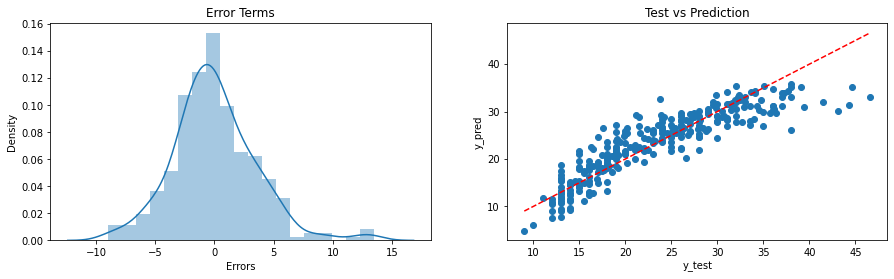

In [82]:
#Evaluating the Multiple Linear Regression Model

print('{}{}\033[1mEvaluating Simple Linear Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
pred1 = MLR.predict(Train_X_std[Train_X.columns[rfe.support_]])#Test_X_sm)
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

print('\n{}Test Set Metrics{}'.format('-'*20, '-'*20))
pred2 = MLR.predict(Test_X_std[Train_X.columns[rfe.support_]])#Test_X_sm)
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.distplot((Train_Y - pred))
plt.title('Error Terms')                  # Plot heading 
plt.xlabel('Errors') 

plt.subplot(1,2,2)
plt.scatter(Train_Y,pred)
plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
plt.title('Test vs Prediction')              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_pred')                          # Y-label
plt.show()

---

### Conclusion:
It is clear that both manual & automatic methods intend to drop two varibles, but comparing both models, we can see that following dropping the columns recommended by VIF Technique gave better generalizability & better metrics for test set. Hence it is better to drop the features 'weight' and 'displacement' in order to prevent issue of multicollinearity.

---

# <center> 6. Predictive Modelling

In [83]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])

def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(Train_X_std):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

---

**Objective:** Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets...

## 6a. Multiple Linear Regression(MLR)

<img src="mr.png" style="width: 600px;float: left;"/>

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-2.17838243 -3.62206739 -1.32135996  2.37863175  1.17002319]
The Intercept of the Regresion Model was found to be  23.537919463087256


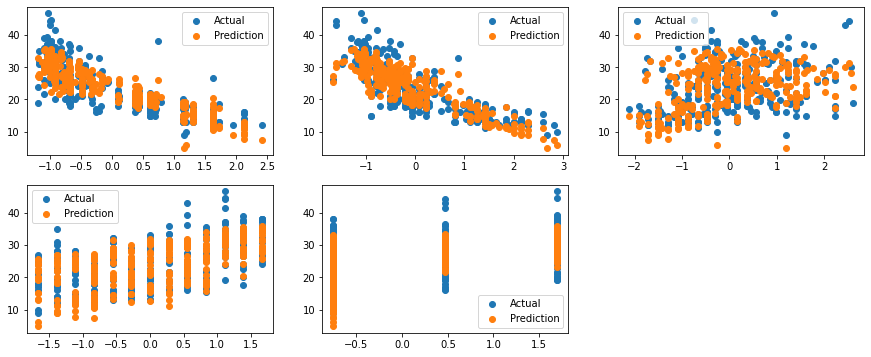



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.79
Residual Sum of Squares (RSS) on Training set  ---> 3702.32
Mean Squared Error (MSE) on Training set       ---> 12.42
Root Mean Squared Error (RMSE) on Training set ---> 3.52

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8
Residual Sum of Squares (RSS) on Training set  ---> 783.84
Mean Squared Error (MSE) on Training set       ---> 10.45
Root Mean Squared Error (RMSE) on Training set ---> 3.23

--------------------Residual Plots--------------------


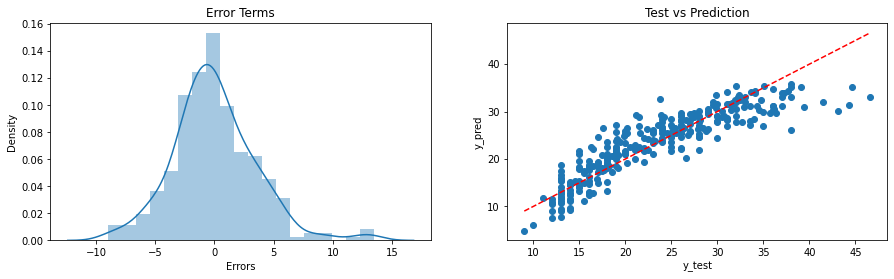

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Train_X_std = Train_X_std[Train_X.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X.columns[rfe.support_]]

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

---

## 6b. Ridge Regression Model

<img src="ridge.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-2.17838243 -3.62206739 -1.32135996  2.37863175  1.17002319]
The Intercept of the Regresion Model was found to be  23.537919463087256


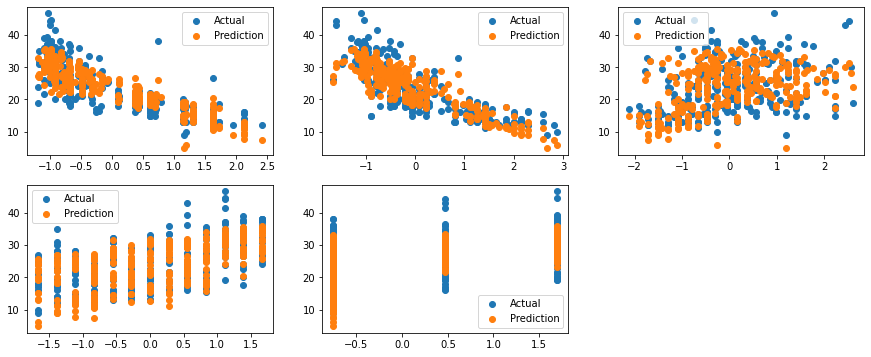



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.79
Residual Sum of Squares (RSS) on Training set  ---> 3702.48
Mean Squared Error (MSE) on Training set       ---> 12.42
Root Mean Squared Error (RMSE) on Training set ---> 3.52

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8
Residual Sum of Squares (RSS) on Training set  ---> 784.56
Mean Squared Error (MSE) on Training set       ---> 10.46
Root Mean Squared Error (RMSE) on Training set ---> 3.23

--------------------Residual Plots--------------------


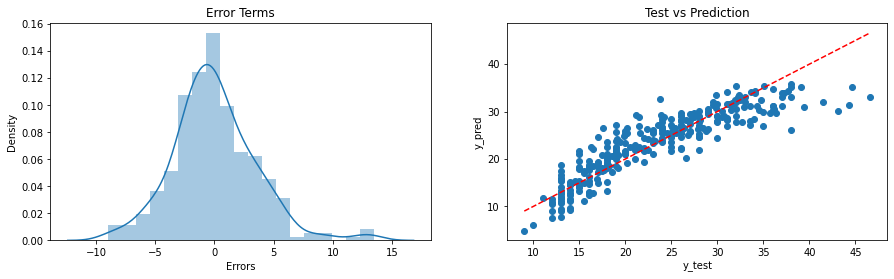

In [85]:
#Creating a Ridge Regression model

from sklearn.linear_model import Ridge

Train_X_std = Train_X_std[Train_X.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X.columns[rfe.support_]]

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

---

## 6c. Lasso Regression Model

<img src="lasso.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-2.17838243 -3.62206739 -1.32135996  2.37863175  1.17002319]
The Intercept of the Regresion Model was found to be  23.537919463087256


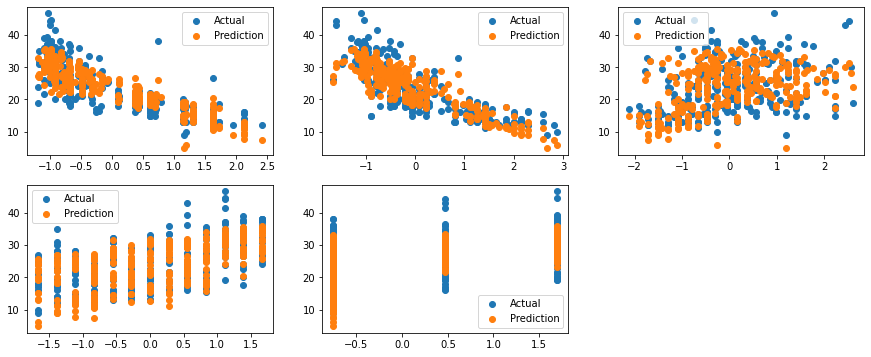



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.74
Residual Sum of Squares (RSS) on Training set  ---> 4540.38
Mean Squared Error (MSE) on Training set       ---> 15.24
Root Mean Squared Error (RMSE) on Training set ---> 3.9

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.75
Residual Sum of Squares (RSS) on Training set  ---> 967.67
Mean Squared Error (MSE) on Training set       ---> 12.9
Root Mean Squared Error (RMSE) on Training set ---> 3.59

--------------------Residual Plots--------------------


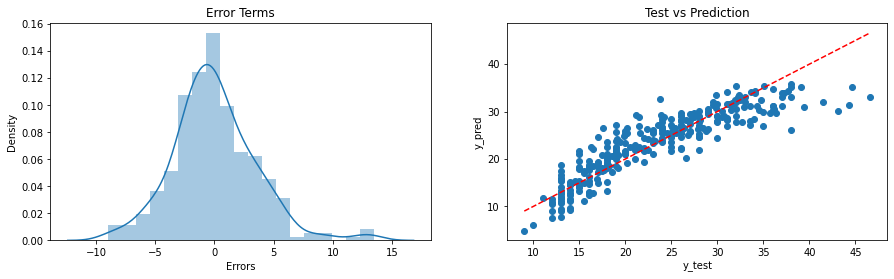

In [86]:
#Creating a Ridge Regression model

from sklearn.linear_model import Lasso

Train_X_std = Train_X_std[Train_X.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X.columns[rfe.support_]]

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

---

## 6d. Elastic-Net Regression

<img src="en.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-2.17838243 -3.62206739 -1.32135996  2.37863175  1.17002319]
The Intercept of the Regresion Model was found to be  23.537919463087256


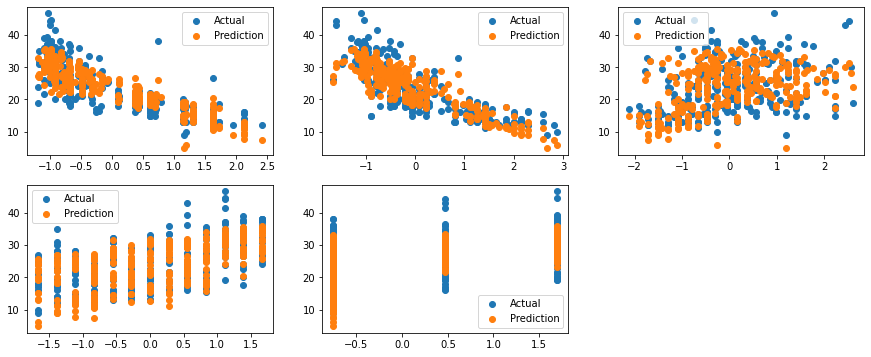



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.72
Residual Sum of Squares (RSS) on Training set  ---> 4878.58
Mean Squared Error (MSE) on Training set       ---> 16.37
Root Mean Squared Error (RMSE) on Training set ---> 4.05

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.74
Residual Sum of Squares (RSS) on Training set  ---> 1013.88
Mean Squared Error (MSE) on Training set       ---> 13.52
Root Mean Squared Error (RMSE) on Training set ---> 3.68

--------------------Residual Plots--------------------


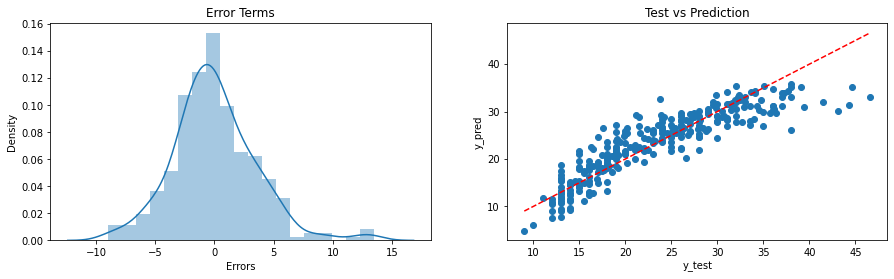

In [87]:
#Creating a ElasticNet Regression model

from sklearn.linear_model import ElasticNet

Train_X_std = Train_X_std[Train_X.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X.columns[rfe.support_]]

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

---

## 6e. Polynomial Regression Model

<img src="pn.png" style="width: 500px;float: left;"/>

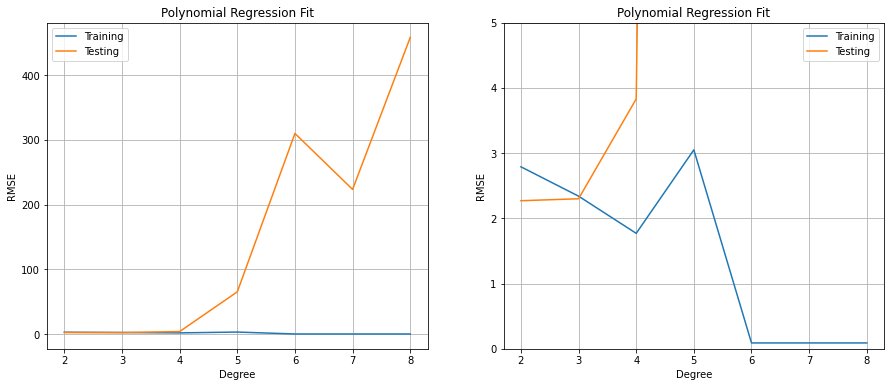

In [88]:
#Checking polynomial regression performance on various degrees

from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]

for i in range(2,9):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,9),Trr, label='Training')
plt.plot(range(2,9),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,9),Trr, label='Training')
plt.plot(range(2,9),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

**Inference:** We can choose 3rd order polynomial regression as it gives the optimal training & testing scores...

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-2.17838243 -3.62206739 -1.32135996  2.37863175  1.17002319]
The Intercept of the Regresion Model was found to be  23.537919463087256


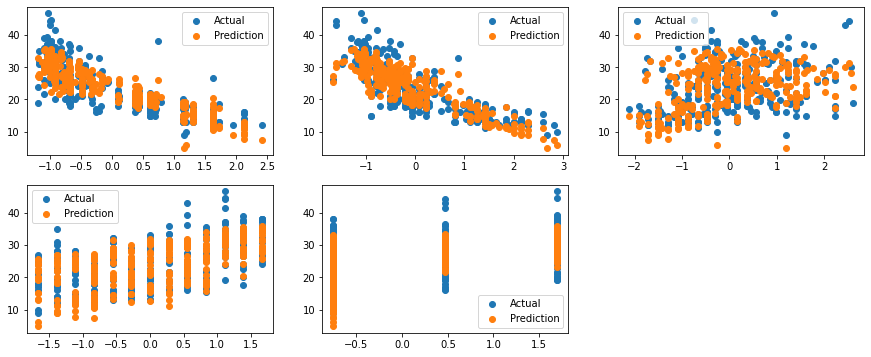



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.91
Residual Sum of Squares (RSS) on Training set  ---> 1626.65
Mean Squared Error (MSE) on Training set       ---> 5.46
Root Mean Squared Error (RMSE) on Training set ---> 2.34

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9
Residual Sum of Squares (RSS) on Training set  ---> 395.27
Mean Squared Error (MSE) on Training set       ---> 5.27
Root Mean Squared Error (RMSE) on Training set ---> 2.3

--------------------Residual Plots--------------------


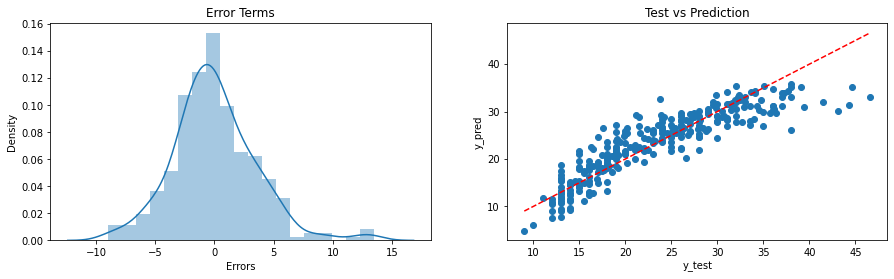

In [89]:
#Using the 3rd Order Polynomial Regression model (degree=3)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

---

### 6f. Comparing the Evaluation Metics of the Models

In [48]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.79,0.80,3702.32,783.84,12.42,10.45,3.52,3.23
Ridge Linear Regression (RLR),0.79,0.80,3702.48,784.56,12.42,10.46,3.52,3.23
Lasso Linear Regression (LLR),0.74,0.75,4540.38,967.67,15.24,12.90,3.90,3.59
Elastic-Net Regression (ENR),0.72,0.74,4878.58,1013.88,16.37,13.52,4.05,3.68
Polynomial Regression (PNR),0.91,0.90,1626.65,395.27,5.46,5.27,2.34,2.30


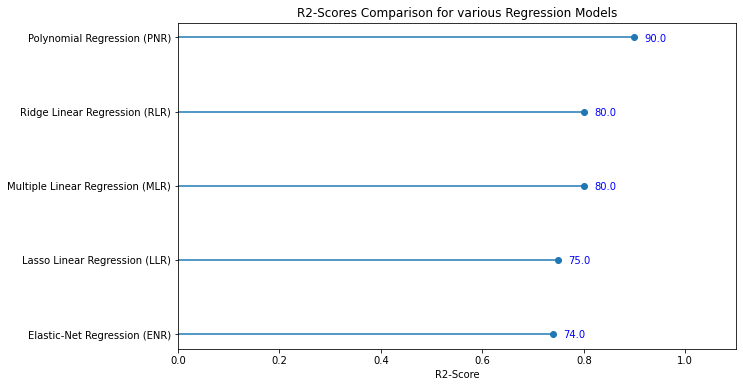

In [49]:
# R2-Scores Comparison for different Regression Models

R2 = EMC['Test-R2'].sort_values(ascending=True)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

**Inference:** From the above plot, it is clear that the polynomial regresion models have the highest explainability power  to understand the dataset.

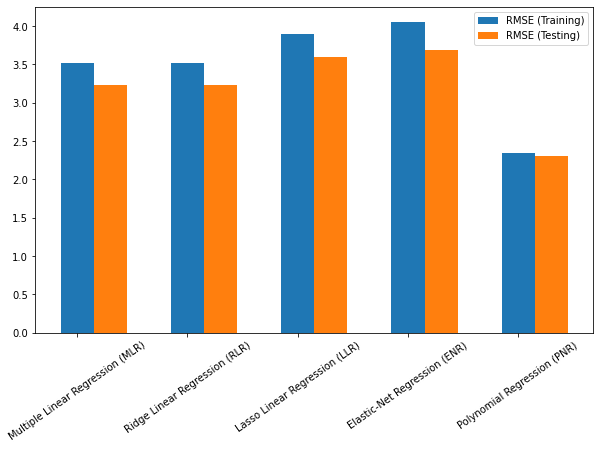

In [90]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5

plt.bar(np.arange(s), Model_Evaluation_Comparison_Matrix[cc[-2]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(s)+0.3, Model_Evaluation_Comparison_Matrix[cc[-1]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(s),EMC.index, rotation =35)
plt.legend()
plt.show()

**Inference:** Lesser the RMSE, better the model! Also, provided the model should have close proximity with the training & testing scores. \
For this problem, it is can be said that polynomial regressions are the best choice to go with...

---

## <center> 10. Project Outcomes & Conclusions

---

### Here are some of the key outcomes of the project:
- The Dataset was quiet small totally just 398 samples & after preprocessing 6.3% of the datasamples were dropped. 
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
- The features had high multicollinearity, hence in Feature Extraction step, we used VIF & RFE Techniques to drop highly correlated features.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- While, Polynomial Regression (Order-3) gave the best overall scores for the current dataset, yet it wise to also consider simpler models like MLR & ENR as they are more generalisable.

In [ ]:
<<<----------------------------------------------THE END---------------------------------------------------------->>>